# Plot grafa podataka iz .csv filea

Demo kako uz pomoc pythona i _matplotlib_ biblioteke za prikaz grafova

Prvo uvezemo potrbne bibliteke

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt, arange, sin, pi
from matplotlib import style
from matplotlib import dates as mpl_dates
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Unese se ime datoteke s podacima i mapiraju se polja sukladno zapisanome.

U ovom primjeru podaci su razdvojeni s znakom ',' ali cesti je slucaj kada su podaci odvojeni nekim drugim znakom te se to treba posebno naznaciti kako bi program znao granice izmedu polja.

In [27]:
filename='GPSLOG10.CSV'
#plt.style.use('ggplot')
data=pd.read_csv(filename, header=None, delimiter=',', names=['Sentence','Time','Validity','Latitue','NS','Longitude','EW','Speed',
                                               'Direction','Date','NA1','NA2','Checksum','Temperature'])

Sada smo spremni za prikazati prikupljene podatke.

Prvo mozemo prikazati jednostavan s/t graf - brzinu u vremenu. Kako je brzina zapisana u cvorovima, a mi je zelimo prikazati u km/h potrebno izvrsiti konverziju. 1 nauticna milja odgovara 1.852 km.

Svaki graf treba imati oznacene osi. S komandom plt.xlabel i ylabel oznacili smo osi grafa i analogno tome imenovan je i graf kako bi citatelj znao što graf predstavlja.
Naravno, pojedinacni grafovi se mogu posebno spremiti u visokoj rezoluciji i zeljenom formatu za kasniju upotrebu.

Text(0.5, 1.0, 'Brzina kretanja vozila')

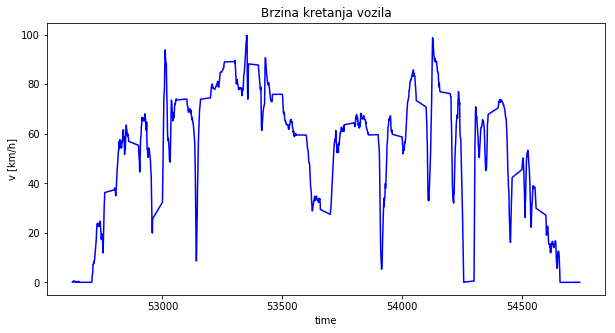

In [28]:
#otvori graf u novom prozoru
#%matplotlib qt
#plt.plot(data['Time'],data['Speed']*1.852, 'b-')
plt.plot(data['Time'],data['Speed']*1.852, 'b-')

plt.xlabel ('time')
plt.ylabel ('v [km/h]')
plt.title('Brzina kretanja vozila')
#plt.savefig('GrafKretanjaBrzineVozila.png',format='png', bbox_inches='tight', dpi=100)

Dodatno se mogu izracunati i pogledati razni podaci koje nas zanimaju.

Ako npr. zelimo znati koja je bila maksimalna brzina kojom se vozilo kretalo to se moze vidjeti na sljedeci nacin:

In [29]:
print('Maksimalna brzina = ',np.max(data['Speed']*1.852) , 'km/h')

Maksimalna brzina =  99.73020000000001 km/h


Ako nas zanimaju podaci o temperaturi moguce je cak koristiti i ugradene statisticke funkcije za izracunati zeljene podatke

Minimalna temperatura:  25.73 °C
Maximalna temperatura:  27.99 °C
Razlika temperature:  2.259999999999998 °C
Razlika temperature:  2.26 °C
Prosjecna temperatura:  26.64 °C ±  0.57 °C


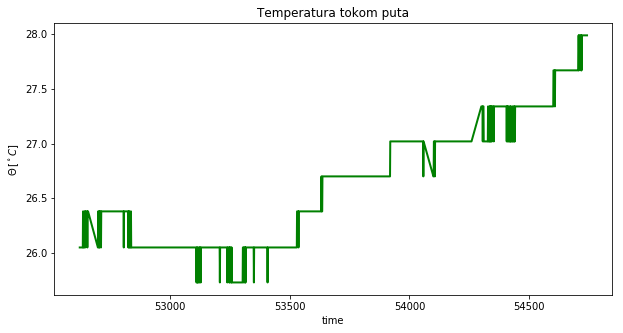

In [30]:
# prikazi graf inline
%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(data['Time'],data['Temperature'], 'g', linewidth=2)

plt.xlabel ('time')
plt.ylabel ('$\Theta \, [^\circ C]$')
plt.title('Temperatura tokom puta')

print ('Minimalna temperatura: ',np.min(data['Temperature']), '°C')
print ('Maximalna temperatura: ',np.max(data['Temperature']), '°C')
print ('Razlika temperature: ',np.max(data['Temperature']) - np.min(data['Temperature']), '°C')
print ('Razlika temperature: ','{:.2f}'.format(np.ptp(data['Temperature'])), '°C')
print ('Prosjecna temperatura: ', '{:.2f}'.format(np.mean(data['Temperature'])), '°C ± ',
       '{:.2f}'.format(np.std(data['Temperature'])), '°C')

Ako želimo plotati ove dvije veličine na istom grafu da vizualno utvrdimo postojanje korelacije možemo kreirati `subplot`

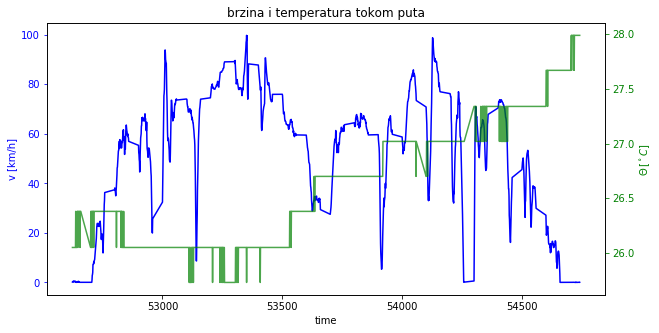

In [31]:
fig, ax1 = plt.subplots()
plt.title('brzina i temperatura tokom puta')

ax1.plot(data['Time'],data['Speed']*1.852, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('v [km/h]', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(data['Time'],data['Temperature'], 'g', alpha=0.7)
ax2.set_ylabel('$\Theta \, [^\circ C]$', color='g')
ax2.tick_params('y', colors='g')

Uvidom u graf ne mozemo vizualno utvdriti postoje zavisnosti jedve velicine o drugoj, ali se moze primjetiti trend porasta temperature s vremenom.
Koji je tocan uzrok tome treba dodatno istraziti sto nije predmet ovog rada.